# 3.7 Guia - Serie Temporal

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_dados = pd.read_csv('AirPassengers.csv')
base_dados.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# Ajustando a coluna para data
base_dados['Month'] = pd.to_datetime(
        base_dados['Month'],
        infer_datetime_format=True) #converter string em Data

In [4]:
base_dados = base_dados.set_index(['Month'])

In [5]:
base_dados.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
# Verificando as colunas
for Coluna in base_dados.columns:
    print(Coluna)

#Passengers


In [8]:
# dimensão
base_dados.shape

(144, 1)

In [9]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [10]:
base_dados.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [11]:
# configurar a visualização
#%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#configurando parâmetros das fontes
plt.rcParams['font.family'] = 'sans-serif'

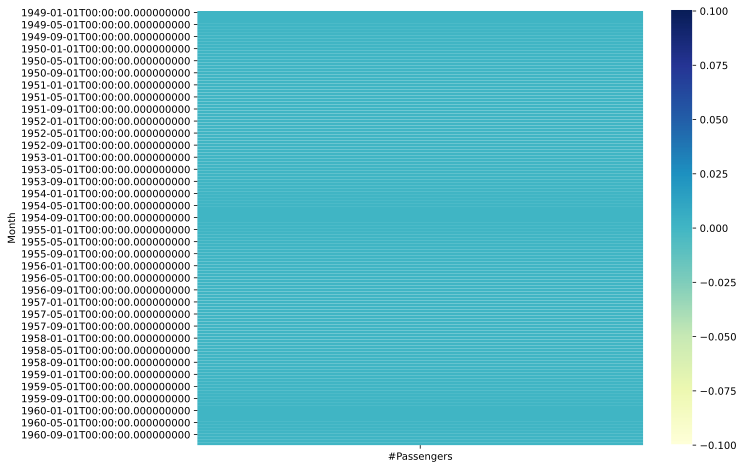

In [12]:
# Verificando os dados
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(base_dados.isnull(),cmap='YlGnBu',cbar=True);

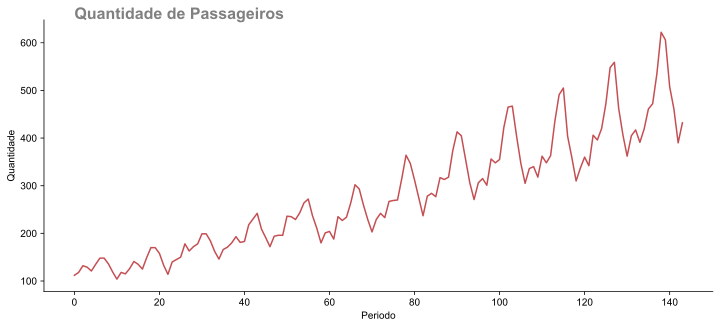

In [13]:
# Separando o Gráfico
Eixo_1 = base_dados['#Passengers'].values

# Plotando o gráfico
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(Eixo_1,color='r')
sns.set(style='darkgrid')
plt.xlabel('Periodo')
plt.ylabel('Quantidade')

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adicionando um título
plt.text(x=0,
        y=650,
        s='Quantidade de Passageiros',
        fontsize=16,
        color='grey',
        weight='bold');

In [14]:
# Treinando o modelo de Serie Temporal

from statsmodels.tsa.api import ExponentialSmoothing

# Definindo os Parametros

Funcao_serie_temporal= ExponentialSmoothing(
        base_dados,
        seasonal_periods=12,
        trend='additive',
        seasonal='additive').fit(use_boxcox=True)

C:\Users\Vithep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Vithep\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Vithep\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


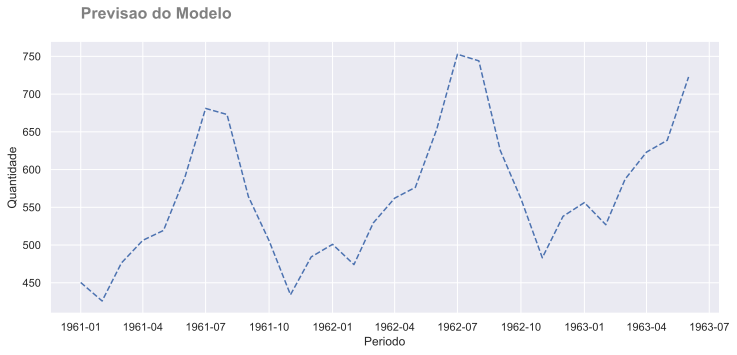

In [19]:
# Definindo os dias a serem previstos
Dias = 30

# Fazendo a previsão usando o Forecast
Previsao = Funcao_serie_temporal.forecast(Dias)

# Plotando o gráfico
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(Previsao,color='b',linestyle='--')
sns.set(style='darkgrid')
plt.xlabel('Periodo')
plt.ylabel('Quantidade')

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adicionando um título
plt.text(x='1961-01', y=800,
        s='Previsao do Modelo',
        fontsize=16,
        color='grey',
        weight='bold');

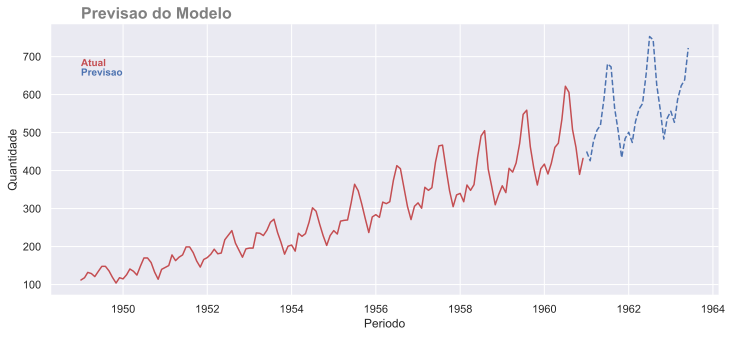

In [31]:
# Criando o modelo
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(Previsao,color='b',linestyle='--')
ax.plot(base_dados['#Passengers'],color='r')
sns.set(style='darkgrid')
plt.xlabel('Periodo')
plt.ylabel('Quantidade')

# Remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adicionando um título
plt.text(x='1949', y=800,
        s='Previsao do Modelo',
        fontsize=16,
        color='grey',
        weight='bold');
plt.text(x='1949', y=675,
        s='Atual',
        fontsize=10,
        color='r',
        weight='bold');
plt.text(x='1949', y=650,
        s='Previsao',
        fontsize=10,
        color='b',
        weight='bold');

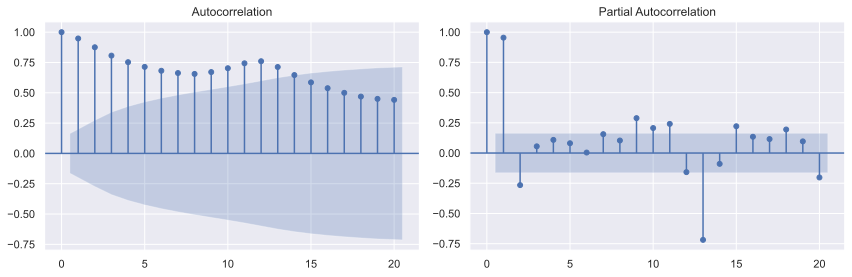

In [36]:
# Verificando a Autocorrelação

import statsmodels.tsa.api as smt

fig,ax = plt.subplots(1,2)

fig.set_figwidth(12)
fig.set_figheight(4)

smt.graphics.plot_acf(base_dados,lags=20,ax=ax[0])
smt.graphics.plot_pacf(base_dados,lags=20,ax=ax[1])
plt.tight_layout()
